<a href="https://colab.research.google.com/github/VANSHG2005/Python/blob/main/Mobile_Price_Range_Prediction_ML_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -Vansh Garg**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install scikit-learn pandas

In [125]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from datetime import datetime
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import shap

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


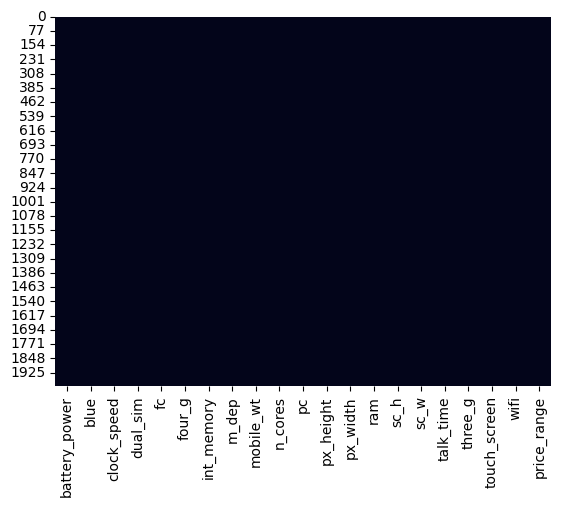

In [ ]:
# Visualizing the missing values
plt.figure()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

battery_power:	Battery power (mAh)

blue:	Bluetooth (0: No, 1: Yes)

clock_speed:	Processor speed in GHz

dual_sim:	Dual SIM (0: No, 1: Yes)

fc:	Front camera megapixels

four_g:	4G support (0: No, 1: Yes)

int_memory:	Internal memory (GB)

m_dep:	Mobile depth (cm)

mobile_wt:	Weight (grams)

n_cores:	Number of cores

pc:	Primary camera megapixels

px_height:	Pixel resolution height

px_width:	Pixel resolution width

ram:	RAM (MB)

sc_h:	Screen height (cm)

sc_w:	Screen width (cm)

talk_time:	Talk time (hours)

three_g:	3G support (0: No, 1: Yes)

touch_screen:	Touch screen (0: No, 1: Yes)

wifi:	WiFi support (0: No, 1: Yes)

price_range: 	Target: Price range (0: Low, 1: Medium, 2: High, 3: Very High)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# 3. Create a new feature: pixel_area (px_height * px_width)
df['pixel_area'] = df['px_height'] * df['px_width']

# 4. Convert binary columns to 'category' dtype
binary_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[binary_columns] = df[binary_columns].astype('category')

# 5. Convert the target variable to 'category' dtype
df['price_range'] = df['price_range'].astype('category')

In [ ]:
# 6. Final info to confirm changes
print("\nFinal DataFrame Info:")
print(df.info())

# 7. Preview the first few rows
print("\nFirst 5 Rows:")
print(df.head())


Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int64   
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g   

### What all manipulations have you done and insights you found?

- Created a new feature: pixel_area = px_height × px_width to represent screen resolution size.
- Converted binary features (blue, dual_sim, four_g, three_g, touch_screen, wifi) to category dtype for better memory usage and clarity.
- Converted target variable price_range to category for classification modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

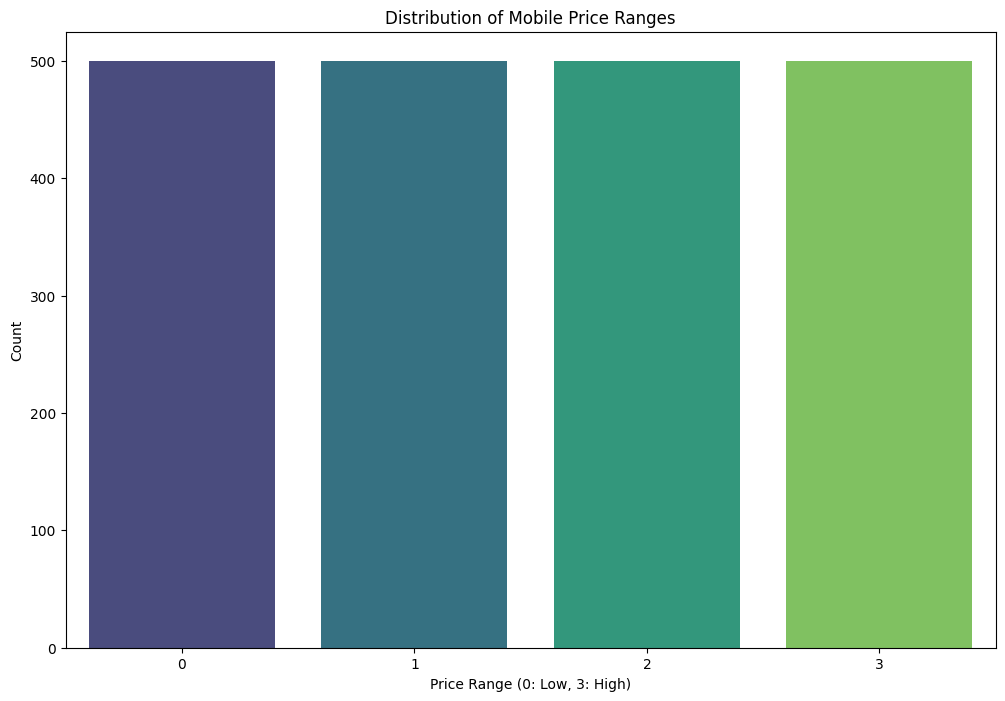

In [ ]:
# Chart - 1 visualization code
# Distribution of Mobile Price Ranges

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='price_range', palette='viridis')
plt.title("Distribution of Mobile Price Ranges")
plt.xlabel("Price Range (0: Low, 3: High)")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

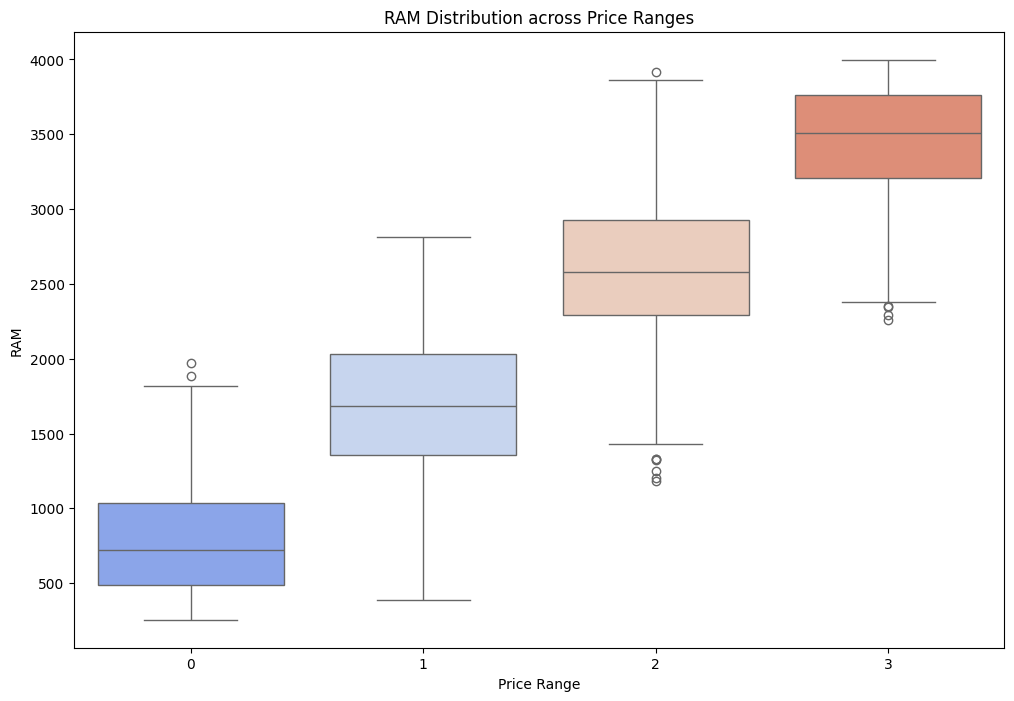

In [ ]:
# Chart - 2 visualization code
# RAM vs Price Range

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='price_range', y='ram', palette='coolwarm')
plt.title("RAM Distribution across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("RAM")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

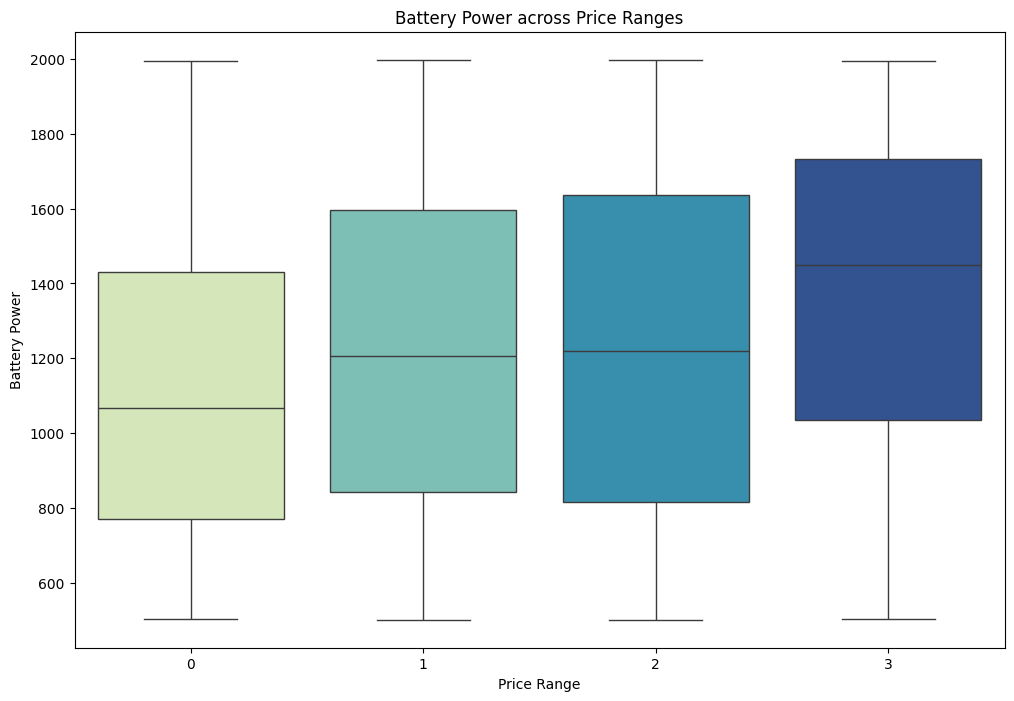

In [ ]:
# Chart - 3 visualization code
# Battery Power vs Price Range

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='price_range', y='battery_power', palette='YlGnBu')
plt.title("Battery Power across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Battery Power")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

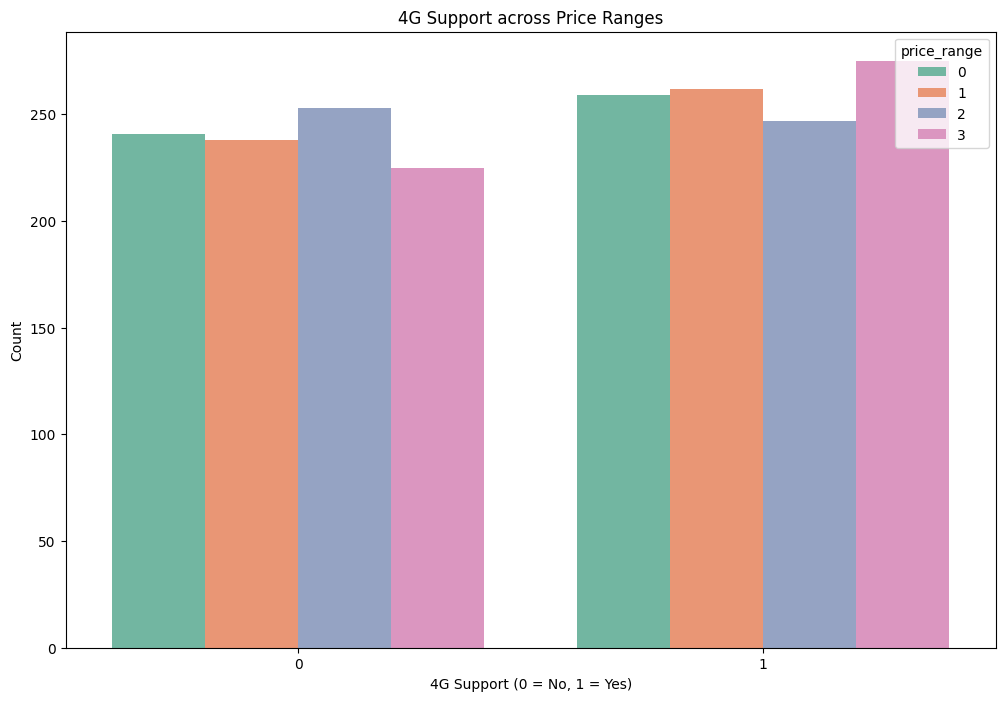

In [ ]:
# Chart - 4 visualization code
# Does 4G availability impact price?

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='four_g', hue='price_range', palette='Set2')
plt.title("4G Support across Price Ranges")
plt.xlabel("4G Support (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

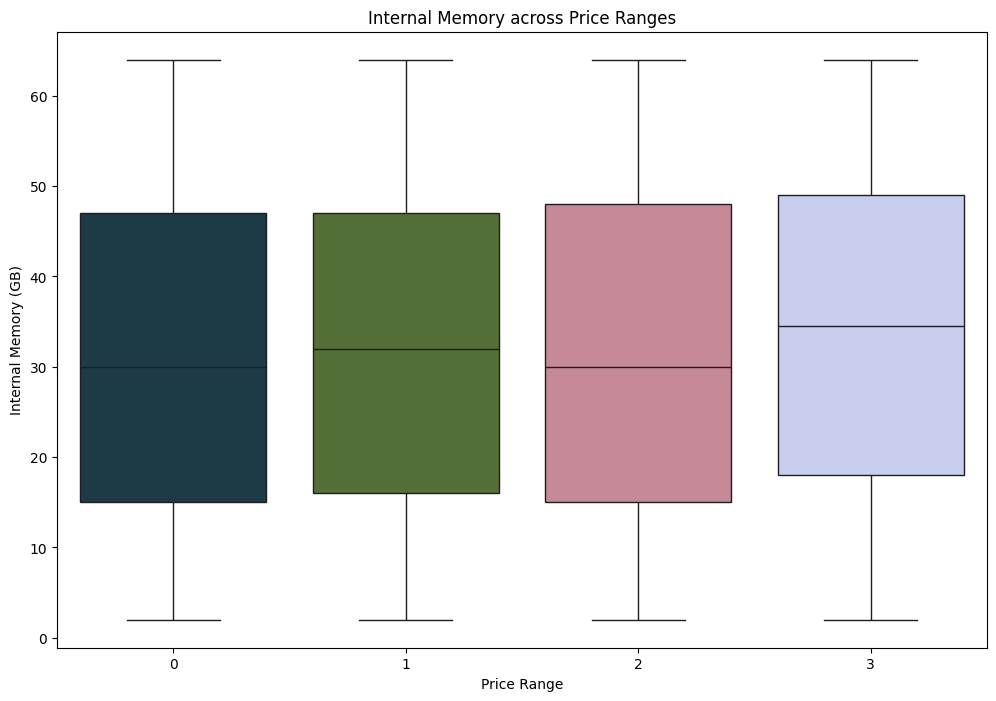

In [ ]:
# Chart - 5 visualization code
# Internal Memory vs Price Range

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='price_range', y='int_memory', palette='cubehelix')
plt.title("Internal Memory across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Internal Memory (GB)")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

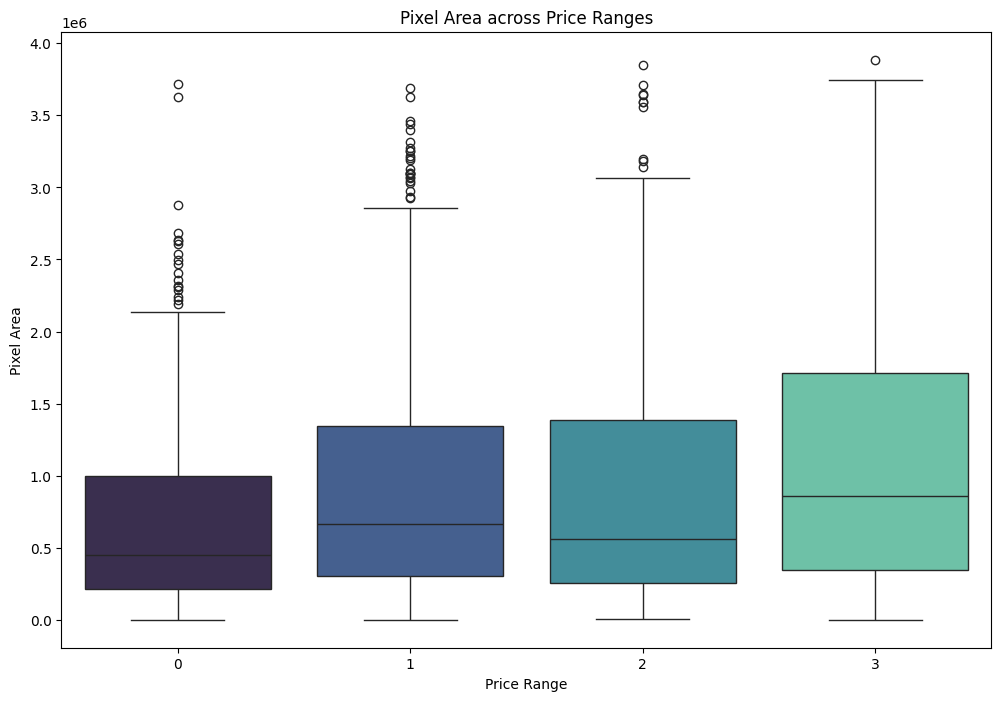

In [ ]:
# Chart - 6 visualization code
# Pixel Resolution (Width × Height) vs Price

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='price_range', y='pixel_area', palette='mako')
plt.title("Pixel Area across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Pixel Area")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

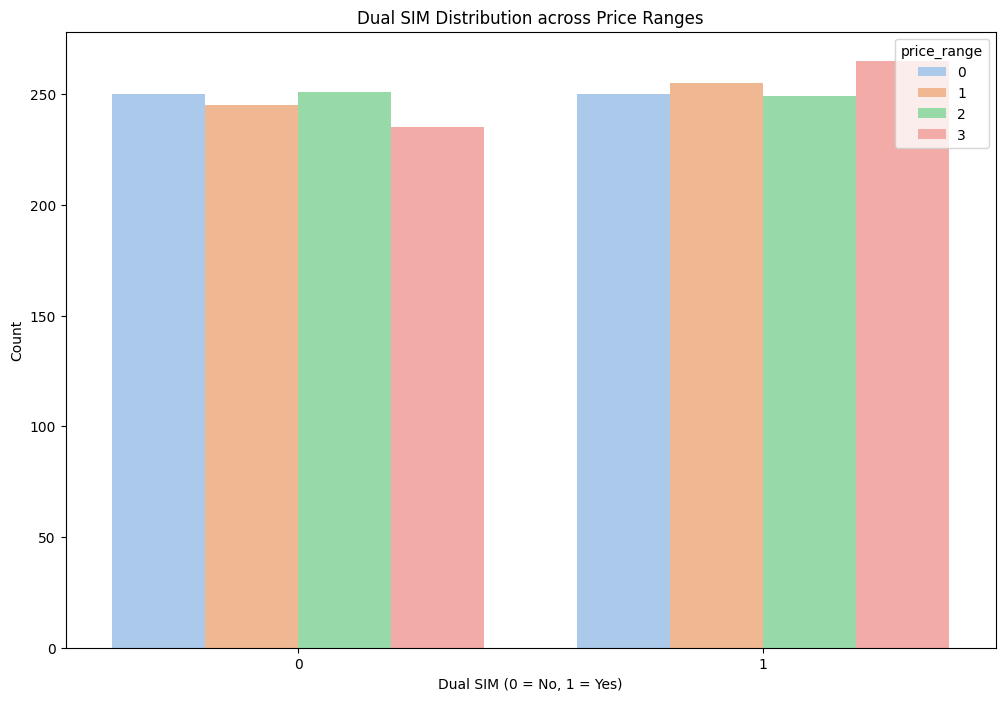

In [ ]:
# Chart - 7 visualization code
# Dual SIM vs Price Range

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='dual_sim', hue='price_range', palette='pastel')
plt.title("Dual SIM Distribution across Price Ranges")
plt.xlabel("Dual SIM (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

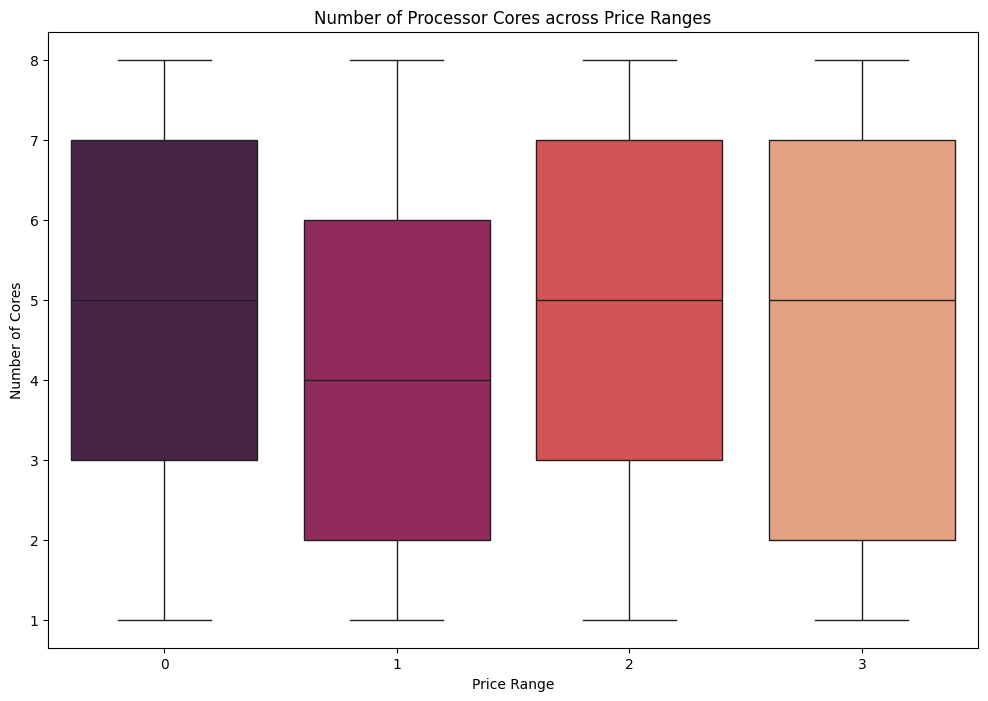

In [ ]:
# Chart - 8 visualization code
# Number of Processor Cores vs Price Range

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='price_range', y='n_cores', palette='rocket')
plt.title("Number of Processor Cores across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Cores")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

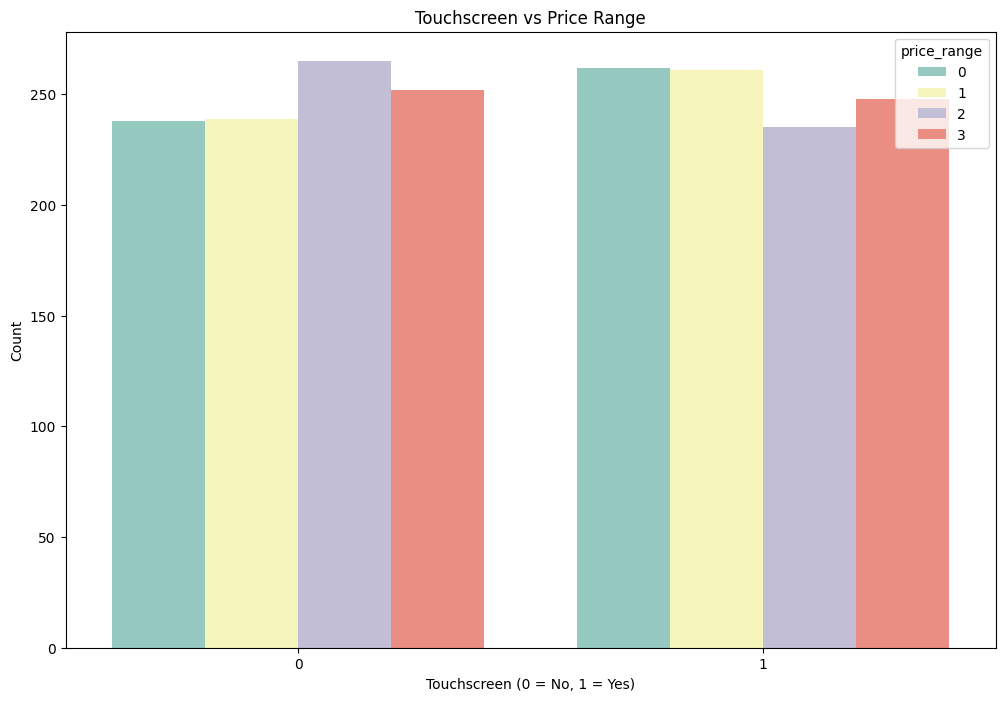

In [ ]:
# Chart - 9 visualization code
# Presence of Touchscreen vs Price

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='touch_screen', hue='price_range', palette='Set3')
plt.title("Touchscreen vs Price Range")
plt.xlabel("Touchscreen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

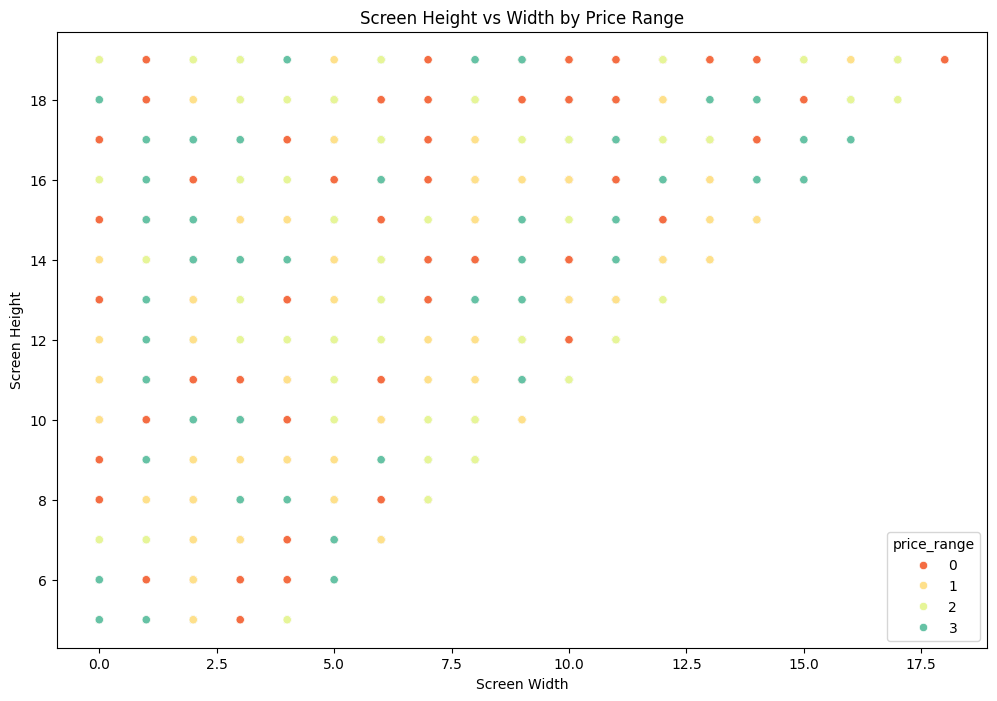

In [ ]:
# Chart - 10 visualization code
# Screen Height vs Width by Price Range

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='sc_w', y='sc_h', hue='price_range', palette='Spectral')
plt.title("Screen Height vs Width by Price Range")
plt.xlabel("Screen Width")
plt.ylabel("Screen Height")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

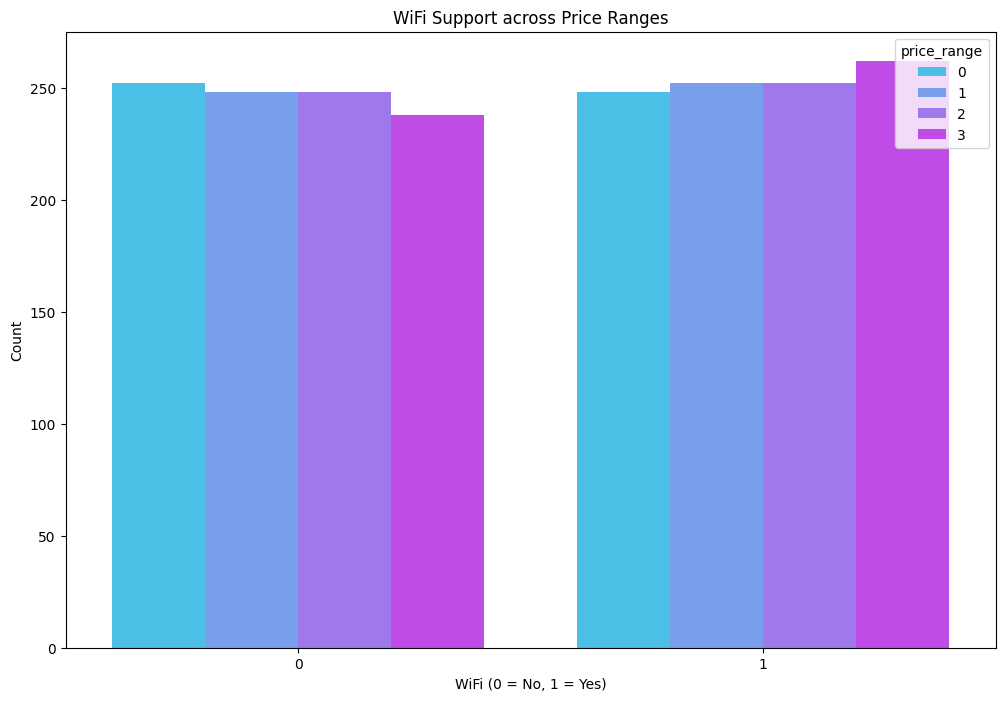

In [ ]:
# Chart - 11 visualization code
# Devices with WiFi across Price Ranges

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='wifi', hue='price_range', palette='cool')
plt.title("WiFi Support across Price Ranges")
plt.xlabel("WiFi (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

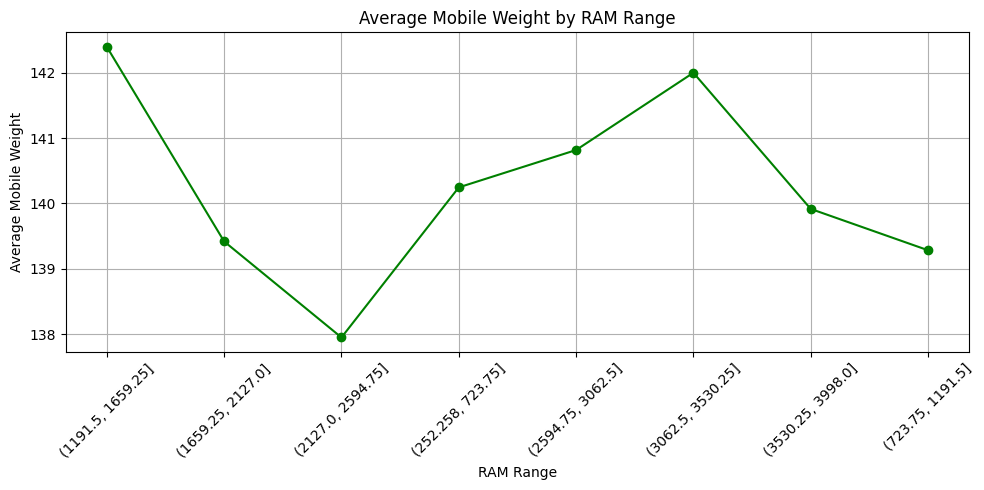

In [ ]:
# Chart - 12 visualization code
# Average Mobile Weight per RAM Group (binned)

# 1. Create RAM bins and convert intervals to strings
ram_bins = pd.cut(df['ram'], bins=8)
df['ram_bin'] = ram_bins.astype(str)

# 2. Group by RAM bin and calculate average mobile weight
ram_grouped = df.groupby('ram_bin')['mobile_wt'].mean().reset_index()

# 3. Plot Line Chart
plt.figure(figsize=(10,5))
plt.plot(ram_grouped['ram_bin'], ram_grouped['mobile_wt'], marker='o', color='green', linestyle='-')
plt.title("Average Mobile Weight by RAM Range")
plt.xlabel("RAM Range")
plt.ylabel("Average Mobile Weight")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Correlation Heatmap

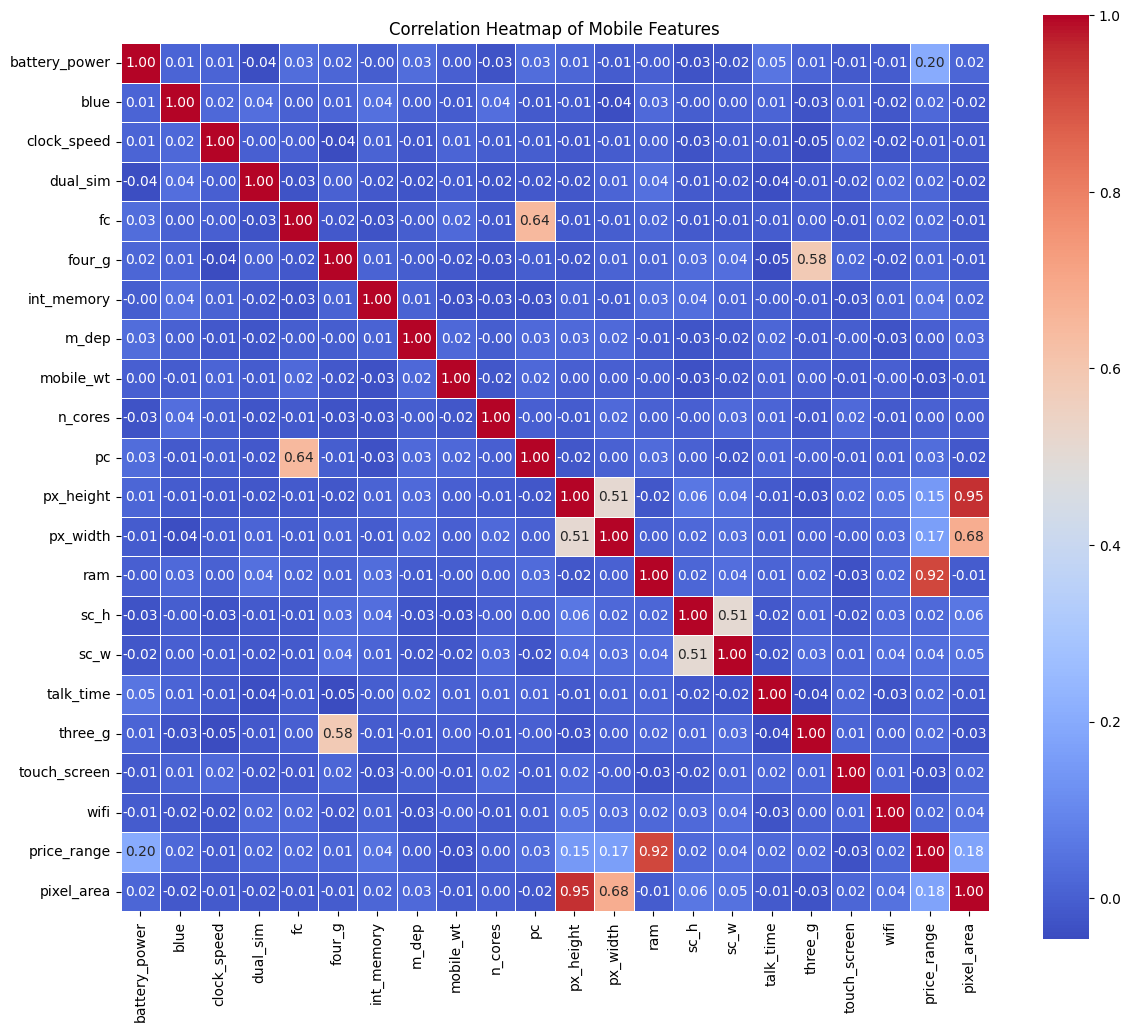

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(14,12))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Mobile Features")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14 - Pair Plot

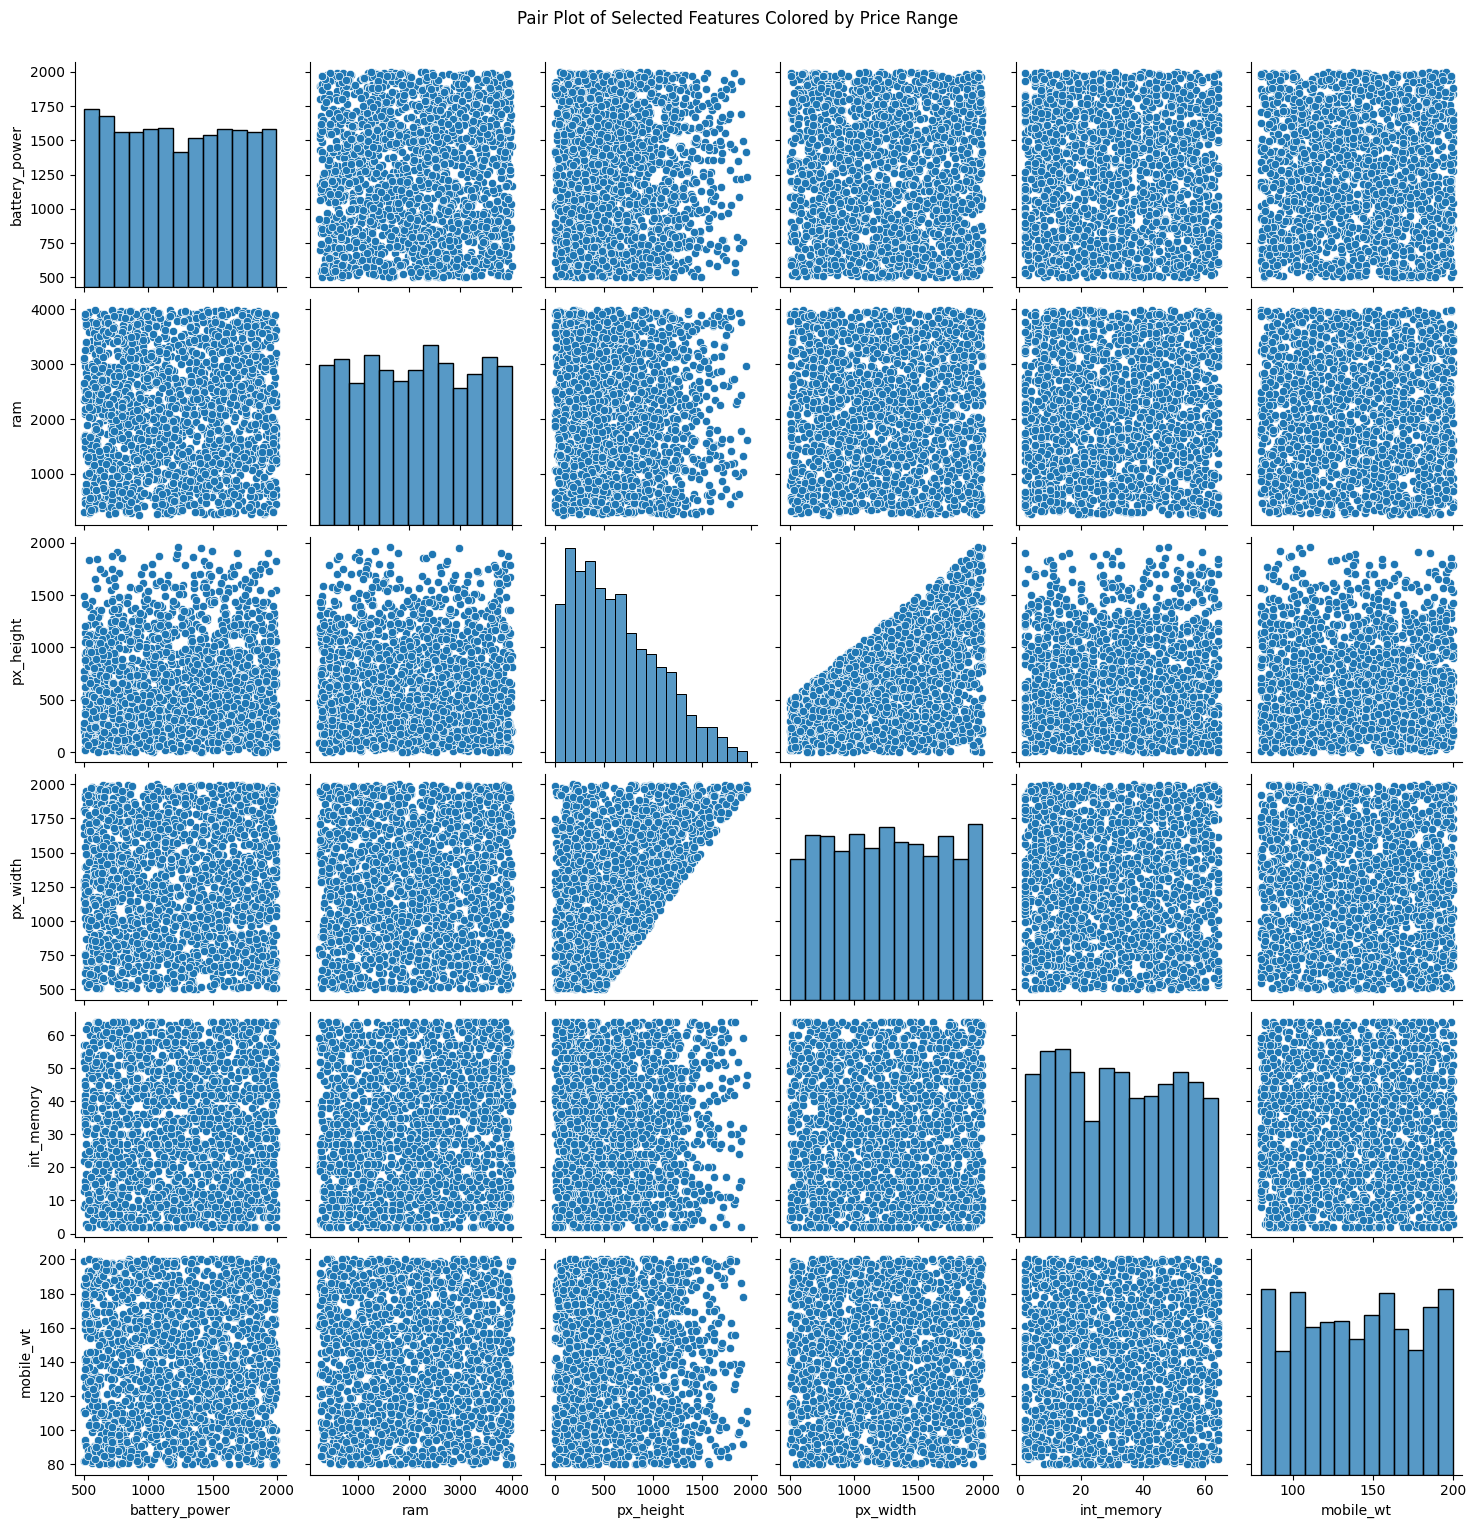

In [ ]:
# Pair Plot visualization code

# Select relevant features for pair plot
selected_features = ['battery_power', 'ram', 'px_height', 'px_width', 'int_memory', 'mobile_wt', 'price_range']

# Create pair plot
sns.pairplot(df[selected_features])
plt.suptitle("Pair Plot of Selected Features Colored by Price Range", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
pixel_area       0
dtype: int64


In [ ]:
#Handling Missing Values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

In [ ]:
print("Any missing values remaining:", df.isnull().sum().sum())

Any missing values remaining: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no Missing Values

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
# Identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR for each numeric column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)
print("Outlier counts per feature:\n", outlier_counts)

Outlier counts per feature:
 pixel_area       61
fc               18
px_height         2
int_memory        0
m_dep             0
battery_power     0
clock_speed       0
n_cores           0
mobile_wt         0
px_width          0
pc                0
ram               0
sc_h              0
sc_w              0
talk_time         0
dtype: int64


In [ ]:
# Apply winsorization (clipping) to all numeric features
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower, upper=upper)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We Used Winsorization to remove outliers because:

- Keeps data size the same.
- Preserves ordering and general distribution.
- Useful for linear models or when you want to reduce outlier influence without removing data.



### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
# Step 1: Identify Categorical Columns

# Check for object type columns (categorical)
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index([], dtype='object')


#### What all categorical encoding techniques have you used & why did you use those techniques?

- Dataset does not contain any object (string-based) columns.

- All features are already numeric — either continuous values or binary/integer-encoded.

- Therefore, no categorical encoding (like Label Encoding or One-Hot Encoding) is needed.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)
X_train_new = selector.transform(X_train)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

# Apply PCA to retain 95% variance
#pca = PCA(n_components=0.95)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.fit_transform(X_test_scaled)

#print("Original shape of Training Data:", X_train_scaled.shape)
#print("Transformed shape of Training Data:", X_train_pca.shape)
#print("Original shape of Test Data:", X_test_scaled.shape)
#print("Transformed shape of Test Data:", X_test_pca.shape)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis)

Used Because of:

- Reduce overfitting
- Improve training efficiency
- Visualize class separability

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Split features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predicted results
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred_lr, y_train)
test_accuracy = accuracy_score(y_test_pred_lr,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)
print(classification_report(y_test, y_test_pred_lr))

Training accuracy: 0.97625
Testing accuracy: 0.975
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.95      0.99      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix

# precision,
log_test_precision = precision_score(y_test, y_test_pred_lr, average='macro')

# recall
log_test_recall = recall_score(y_test, y_test_pred_lr, average='macro')

# f1 score
log_f1_score = f1_score(y_test, y_test_pred_lr, average='macro')

# ROC AUC for multiclass
log_roc_auc_score = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled), multi_class='ovr', average='macro')

# Confusion matrix
log_confusion_mat = confusion_matrix(y_test, y_test_pred_lr)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

Precision score of logistic model: 0.9749950643378084
 
Recall score of logistic model: 0.9742907907310081
 
F1 score of logistic model:  0.9743696794688802
 
ROC AUC score of logistic model:  0.9994903204646365
 
Confusion matrix of logistic model 
: [[102   3   0   0]
 [  1  90   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

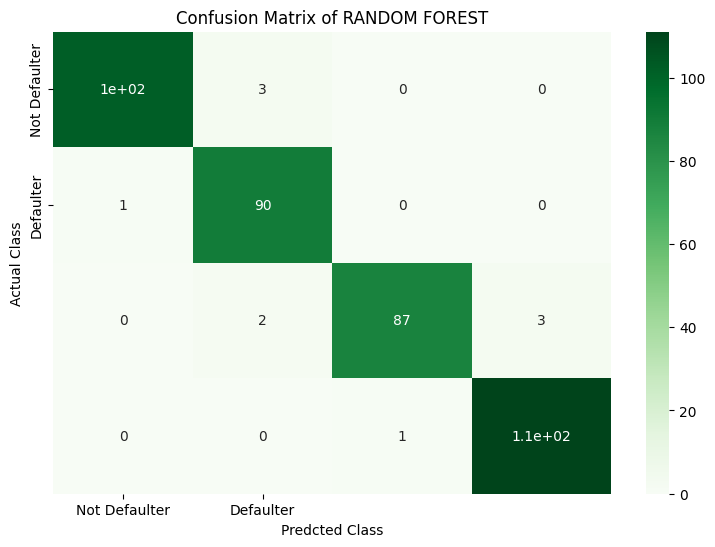

In [ ]:
# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

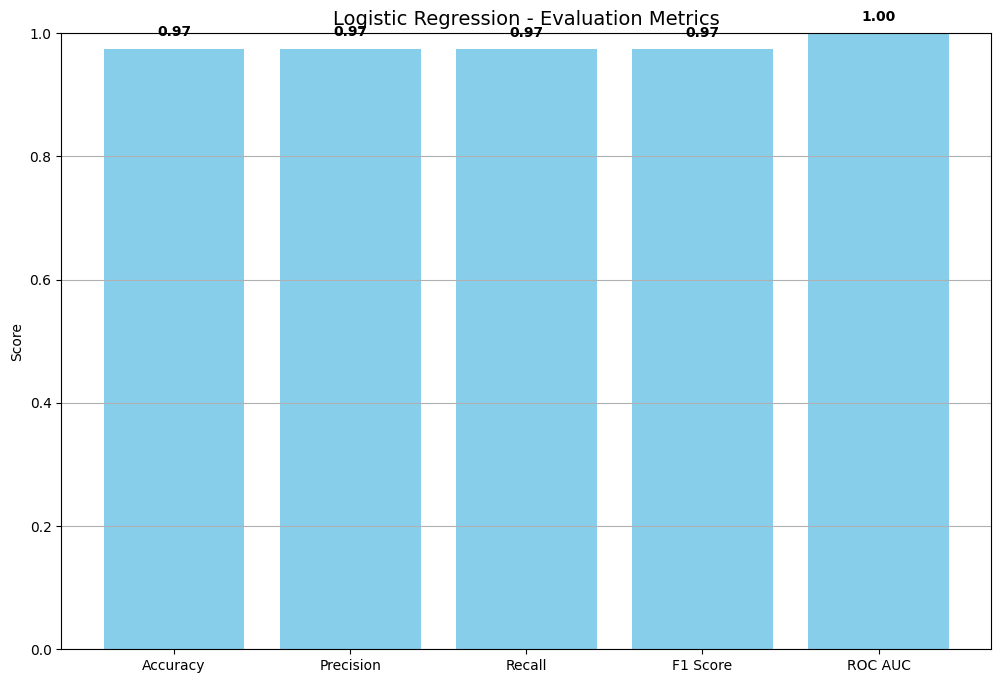

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = {
    'Accuracy': test_accuracy,
    'Precision': log_test_precision,
    'Recall': log_test_recall,
    'F1 Score': log_f1_score,
    'ROC AUC': log_roc_auc_score
}

plt.figure(figsize=(12, 8))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Logistic Regression - Evaluation Metrics", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # Only 'l2' supported by solver 'lbfgs'
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000]
}

# Create model
lr = LogisticRegression(multi_class='ovr')

# Grid Search CV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_lr = grid_search.best_estimator_

# Predictions
y_test_pred_lr_opt = best_lr.predict(X_test_scaled)

# Evaluation metrics after tuning
from sklearn.metrics import classification_report, roc_auc_score

print("Best Params:", grid_search.best_params_)
print("Optimized Model Test Accuracy:", accuracy_score(y_test, y_test_pred_lr_opt))
print(classification_report(y_test, y_test_pred_lr_opt))

# ROC AUC score
lr_roc_auc_opt = roc_auc_score(y_test, best_lr.predict_proba(X_test_scaled), multi_class='ovr', average='macro')
print("Optimized ROC AUC Score:", lr_roc_auc_opt)

Best Params: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Optimized Model Test Accuracy: 0.8825
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.80      0.71      0.76        91
           2       0.75      0.78      0.77        92
           3       0.97      1.00      0.98       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

Optimized ROC AUC Score: 0.9698354234618837


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print("Train Accuracy (before):", train_accuracy)  # from your base model
print("Test Accuracy (before):", test_accuracy)

print("Train Accuracy (after tuning):", accuracy_score(y_train, best_lr.predict(X_train_scaled)))
print("Test Accuracy (after tuning):", accuracy_score(y_test, y_test_pred_lr_opt))


Train Accuracy (before): 0.97625
Test Accuracy (before): 0.975
Train Accuracy (after tuning): 0.885
Test Accuracy (after tuning): 0.8825


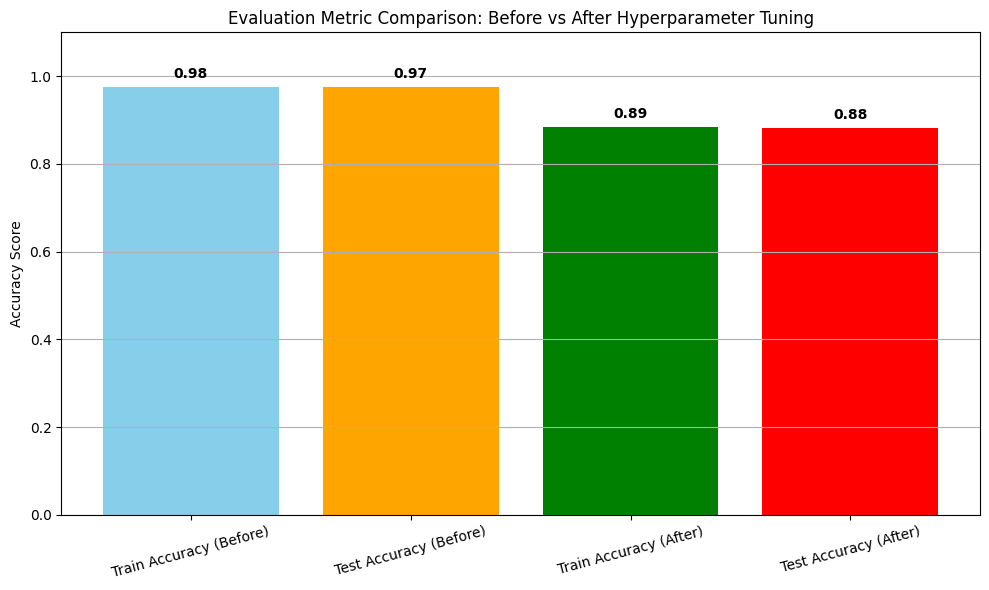

In [ ]:
# Comparison Plot
metrics = {
    "Train Accuracy (Before)": train_accuracy,
    "Test Accuracy (Before)": test_accuracy,
    "Train Accuracy (After)": accuracy_score(y_train, best_lr.predict(X_train_scaled)),
    "Test Accuracy (After)": accuracy_score(y_test, y_test_pred_lr_opt)
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1.1)
plt.title("Evaluation Metric Comparison: Before vs After Hyperparameter Tuning")
plt.ylabel("Accuracy Score")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### ML Model - 2

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_scaled)
y_test_rf_pred = rf_classifier.predict(X_test_scaled)

In [ ]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)
print(classification_report(y_test, y_test_rf_pred))

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.8975
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.87      0.87      0.87        91
           2       0.83      0.88      0.85        92
           3       0.95      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision = precision_score(y_test,y_test_rf_pred, average='macro')

  # recall,
rf_test_recall = recall_score(y_test,y_test_rf_pred, average='macro')

  # f1 score
rf_f1_score = f1_score(y_test,y_test_rf_pred, average='macro')

  # roc_auc_score
rf_roc_auc_score = roc_auc_score(y_test,rf_classifier.predict_proba(X_test_scaled), multi_class='ovr', average='macro')

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']



Precision score of RANDOM FOREST model: 0.8952514242271654
 
Recall score of RANDOM FOREST model: 0.8960702341137123
 
F1 score of RANDOM FOREST model:  0.8952027647116922
 
ROC AUC score of RANDOM FOREST model:  0.9827486584924573
 
Confusion matrix of RANDOM FOREST 
: [[ 99   6   0   0]
 [  7  79   5   0]
 [  0   6  81   5]
 [  0   0  12 100]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

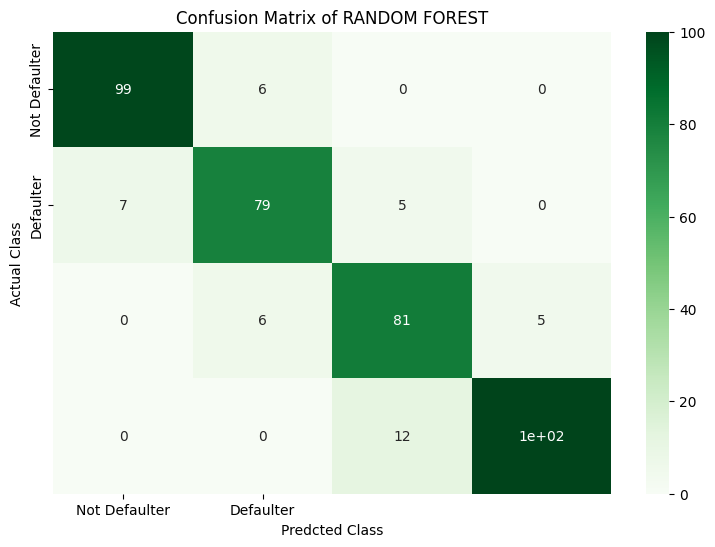

In [ ]:
# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

In [ ]:
# After Feature Selection
rf = RandomForestClassifier()
rf.fit(X_new, y_train)
y_pred_fs = rf.predict(X_test_new)

print("Accuracy of Test Set with selected features:", accuracy_score(y_test, y_pred_fs))

Accuracy of Test Set with selected features: 0.93


In [ ]:

# Accuracy
acc_fs = accuracy_score(y_test, y_pred_fs)

# Precision
prec_fs = precision_score(y_test, y_pred_fs, average='macro')

# Recall
rec_fs = recall_score(y_test, y_pred_fs, average='macro')

# F1 Score
f1_fs = f1_score(y_test, y_pred_fs, average='macro')

# ROC AUC Score
roc_auc_fs = roc_auc_score(y_test, rf.predict_proba(X_test_new), multi_class='ovr', average='macro')

# Confusion Matrix
confusion_fs = confusion_matrix(y_test, y_pred_fs)

# Print Metrics
print("📊 Evaluation Metrics with Feature Selection:")
print(f"Accuracy:     {acc_fs:.4f}")
print(f"Precision:    {prec_fs:.4f}")
print(f"Recall:       {rec_fs:.4f}")
print(f"F1 Score:     {f1_fs:.4f}")
print(f"ROC AUC:      {roc_auc_fs:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_fs))
print("\nConfusion Matrix:\n", confusion_fs)


📊 Evaluation Metrics with Feature Selection:
Accuracy:     0.9300
Precision:    0.9283
Recall:       0.9301
F1 Score:     0.9288
ROC AUC:      0.9918

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.90      0.95      0.92        91
           2       0.88      0.91      0.90        92
           3       0.96      0.92      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400


Confusion Matrix:
 [[ 99   6   0   0]
 [  3  86   2   0]
 [  0   4  84   4]
 [  0   0   9 103]]


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

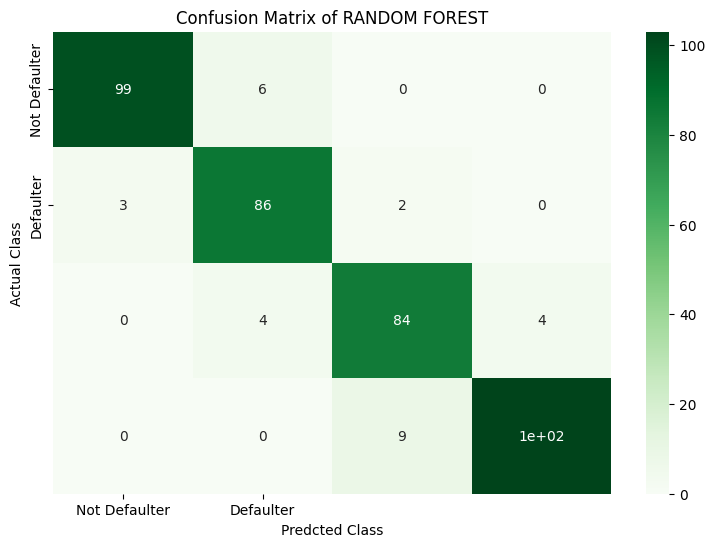

In [ ]:
# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(confusion_fs,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

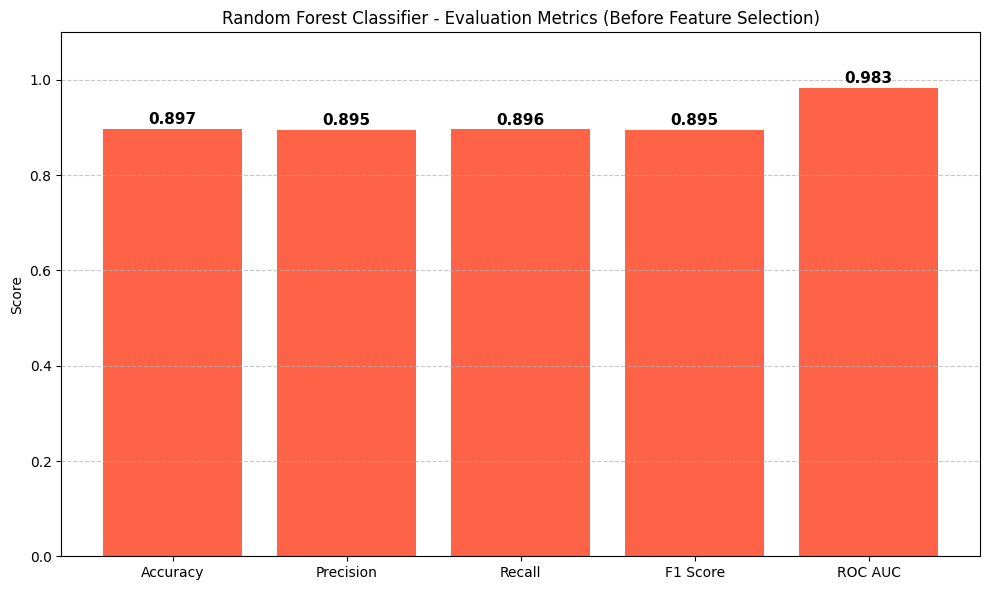

In [ ]:
# Visualizing evaluation Metric Score chart

rf_base_metrics = {
    "Accuracy": rf_testing_accuracy,
    "Precision": rf_test_precision,
    "Recall": rf_test_recall,
    "F1 Score": rf_f1_score,
    "ROC AUC": rf_roc_auc_score
}

# Plotting BEFORE tuning
plt.figure(figsize=(10, 6))
bars = plt.bar(rf_base_metrics.keys(), rf_base_metrics.values(), color='tomato')
plt.ylim(0, 1.1)
plt.title("Random Forest Classifier - Evaluation Metrics (Before Feature Selection)")
plt.ylabel("Score")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.3f}", ha='center', fontsize=11, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

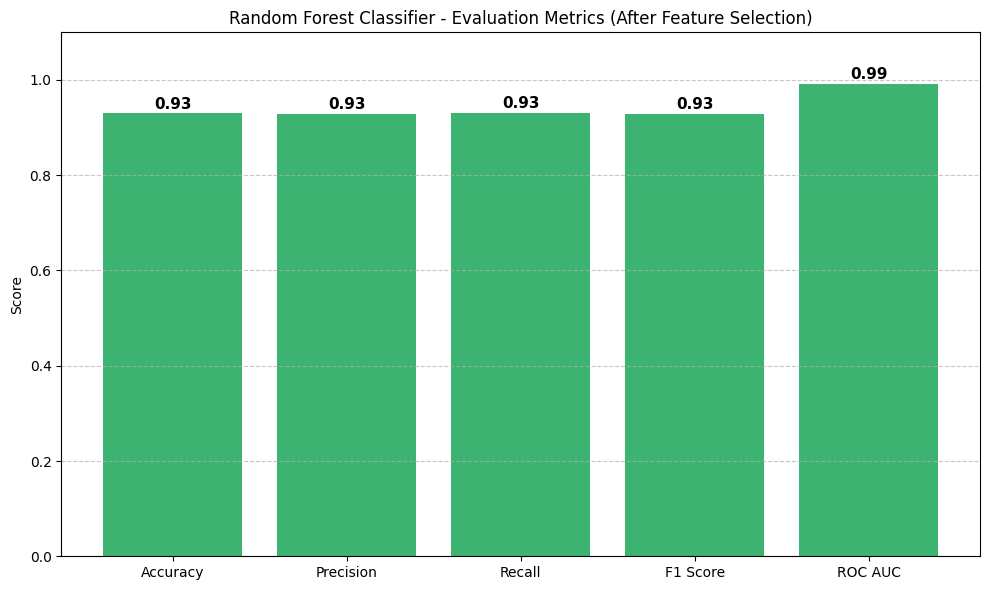

In [ ]:
# Metrics dictionary
rf_fs_metrics = {
    "Accuracy": acc_fs,
    "Precision": prec_fs,
    "Recall": rec_fs,
    "F1 Score": f1_fs,
    "ROC AUC": roc_auc_fs
}

# Plotting AFTER Feature Selection
plt.figure(figsize=(10, 6))
bars = plt.bar(rf_fs_metrics.keys(), rf_fs_metrics.values(), color='mediumseagreen')
plt.ylim(0, 1.1)
plt.title("Random Forest Classifier - Evaluation Metrics (After Feature Selection)")
plt.ylabel("Score")

# Annotating values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}",
             ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize base model
rf_base = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,                 # Number of parameter settings sampled
    cv=5,                      # 5-fold cross validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to selected features
random_search.fit(X_new, y_train)

# Best model after tuning
best_rf_model = random_search.best_estimator_

# Predict on test set with selected features
y_pred_rf_tuned = best_rf_model.predict(X_test_new)

# Evaluation
print(" Best Parameters:", random_search.best_params_)
print("Accuracy after tuning (test set):", accuracy_score(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Accuracy after tuning (test set): 0.93



##### Which hyperparameter optimization technique have you used and why?

We Used **RandomizedSearchCV (Random Search Cross-Validation)**

- RandomizedSearchCV is faster than GridSearchCV, especially when the hyperparameter space is large. It doesn’t try all combinations — it samples a fixed number (n_iter) of combinations randomly, making it ideal for quick tuning.
- It often finds near-optimal solutions without the full computational cost of GridSearchCV.
- It uses internal K-fold cross-validation to assess each combination’s performance, helping avoid overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

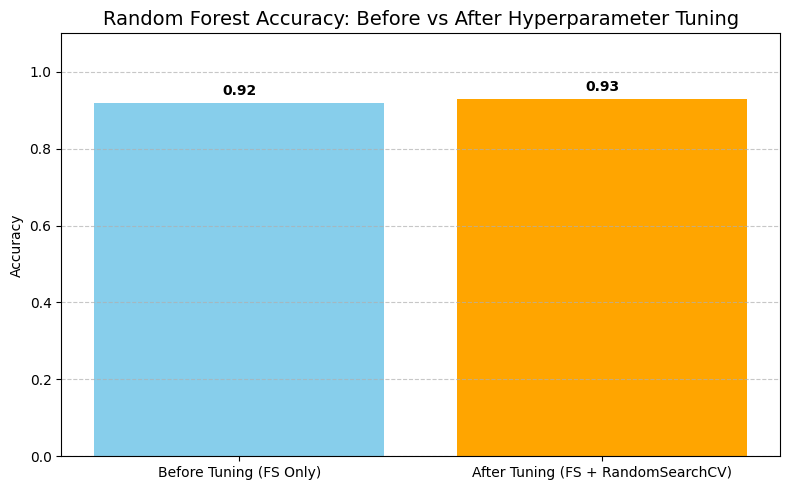

In [ ]:
# Accuracy values (update if needed with your actual results)
accuracy_before_fs = accuracy_score(y_test, y_pred_fs)
accuracy_after_tuning_fs = accuracy_score(y_test, y_pred_rf_tuned)

# Step 1: Plotting the comparison bar chart
metrics = {
    "Before Tuning (FS Only)": accuracy_before_fs,
    "After Tuning (FS + RandomSearchCV)": accuracy_after_tuning_fs
}

# Step 2: Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics.keys(), metrics.values(), color=["skyblue", "orange"])
plt.title("Random Forest Accuracy: Before vs After Hyperparameter Tuning", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)

# Step 3: Annotate accuracy values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy

Definition:
Proportion of total correct predictions among all predictions.

Business Interpretation:
- High accuracy means the model is reliable in general.
- However, if your dataset is imbalanced (e.g., some price ranges are more frequent), accuracy alone may be misleading.
- Useful for initial assessment, especially when all classes are equally important.

Impact: A high accuracy means your company can confidently automate pricing tier predictions, reducing manual errors and improving speed in decision-making for product marketing, inventory, or segmentation.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Pedicting the Model
y_train_dtc_pred = decision_tree_model.predict(X_train_scaled)
y_test_dtc_pred = decision_tree_model.predict(X_test_scaled)

In [ ]:
# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)
print(classification_report(y_test, y_test_dtc_pred))

Training accuracy of decision tree classifier: 1.0
Testing accuracy of decision tree classifier: 0.8425
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       105
           1       0.78      0.85      0.81        91
           2       0.74      0.70      0.72        92
           3       0.87      0.89      0.88       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision = precision_score(y_test,y_test_dtc_pred, average = "macro")

  # recall,
dt_test_recall = recall_score(y_test,y_test_dtc_pred, average = "macro")

  # f1 score
dt_f1_score = f1_score(y_test,y_test_dtc_pred, average = "macro")

# roc_auc_score
dt_roc_auc_score = roc_auc_score(y_test,decision_tree_model.predict_proba(X_test_scaled), multi_class='ovr', average = "macro")
#rf_roc_auc_score = roc_auc_score(y_test,rf_classifier.predict_proba(X_test_scaled), multi_class='ovr', average='macro')

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

Precision score of Decision Tree model: 0.8381680371935244
 
Recall score of Decision Tree model: 0.8372372193024367
 
F1 score of Decision Tree model:  0.8369609634957145
 
ROC AUC score of Decision Tree model:  0.8926029145840536
 
Confusion matrix of Decision Tree model 
: [[ 96   9   0   0]
 [  3  77  11   0]
 [  0  13  64  15]
 [  0   0  12 100]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

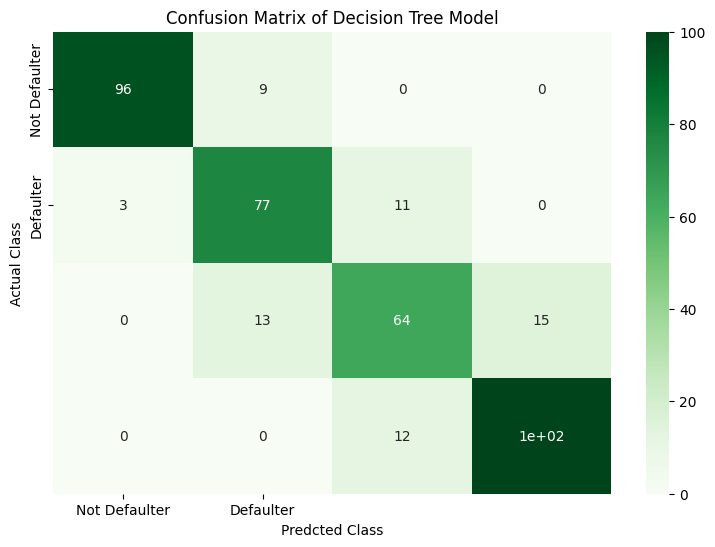

In [ ]:
# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

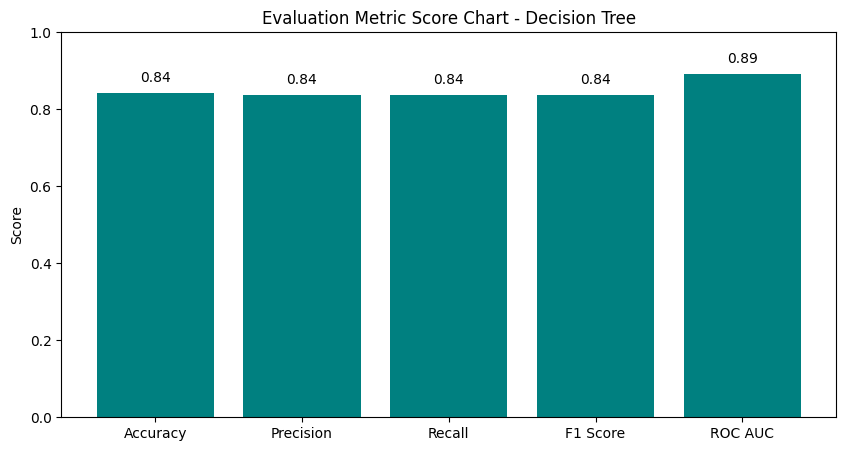

In [120]:
# Visualizing evaluation Metric Score chart

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
before_scores = [dtc_testing_accuracy, dt_test_precision, dt_test_recall, dt_f1_score, dt_roc_auc_score]

# Plotting the chart
plt.figure(figsize=(10, 5))
bars = plt.bar(metrics, before_scores, color='teal')
plt.ylim(0, 1)
plt.title('Evaluation Metric Score Chart - Decision Tree')
plt.ylabel('Score')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate model
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

# Best Estimator
best_dt = grid_search_dt.best_estimator_

# Predictions
y_test_pred_dt_opt = best_dt.predict(X_test_scaled)
y_train_pred_dt_opt = best_dt.predict(X_train_scaled)

# Evaluation
from sklearn.metrics import accuracy_score

print("Train Accuracy (after tuning):", accuracy_score(y_train, y_train_pred_dt_opt))
print("Test Accuracy (after tuning):", accuracy_score(y_test, y_test_pred_dt_opt))

Train Accuracy (after tuning): 0.965
Test Accuracy (after tuning): 0.8675


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization of the Decision Tree Classifier.

- Exhaustive Search: It systematically checks all possible combinations of hyperparameters you define. This ensures that the best possible parameters (within the given grid) are found.

- Cross-Validation Integrated: GridSearchCV performs k-fold cross-validation (default is 5-fold) for each combination. This helps in evaluating the model's performance more reliably than just using a single train/test split.

- Ideal for small grids: Since Decision Tree models are not computationally very expensive, GridSearchCV is a good fit when you're tuning just a few parameters like:

  - max_depth
  - min_samples_split
  - min_samples_leaf
  - criterion (e.g., 'gini', 'entropy')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

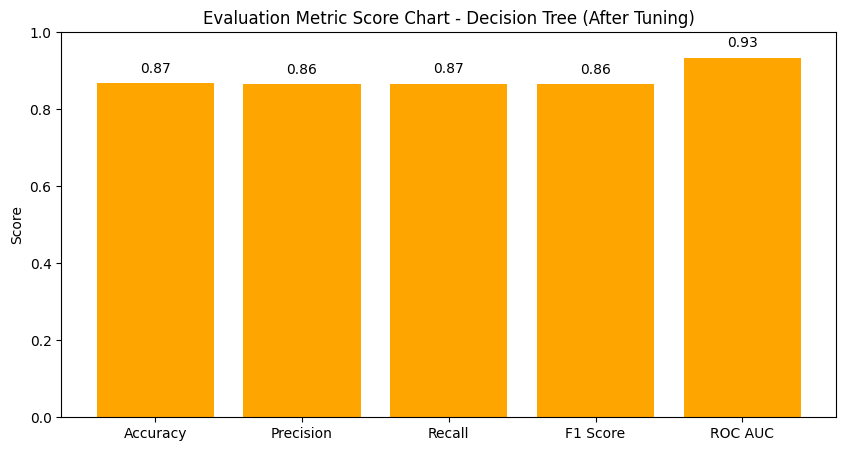

In [123]:

# Calculate metrics after tuning
dt_precision_opt = precision_score(y_test, y_test_pred_dt_opt, average='macro')
dt_recall_opt = recall_score(y_test, y_test_pred_dt_opt, average='macro')
dt_f1_opt = f1_score(y_test, y_test_pred_dt_opt, average='macro')
dt_roc_auc_opt = roc_auc_score(y_test, best_dt.predict_proba(X_test_scaled), multi_class='ovr', average='macro')
dt_accuracy_opt = accuracy_score(y_test, y_test_pred_dt_opt)

# Evaluation metrics and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
after_scores = [dt_accuracy_opt, dt_precision_opt, dt_recall_opt, dt_f1_opt, dt_roc_auc_opt]

# Plotting the chart
plt.figure(figsize=(10, 5))
bars = plt.bar(metrics, after_scores, color='orange')
plt.ylim(0, 1)
plt.title('Evaluation Metric Score Chart - Decision Tree (After Tuning)')
plt.ylabel('Score')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation Metrics & Why They Matter for Business

- **Accuracy:**	Measures the overall correctness of the model. Useful if classes are balanced.
- **Precision:**	Indicates how many predicted positives are actually correct. Important when false positives are costly.
- **Recall:**	Indicates how many actual positives were correctly identified. Crucial when false negatives are costly.
- **F1 Score:**	Harmonic mean of precision and recall. Useful for imbalanced datasets where both are important.
- **ROC AUC:** Score	Shows how well the model distinguishes between classes. A high AUC implies better classification ability across thresholds.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Chosen Model: Logistic Regression**

1. Highest Accuracy

- Logistic Regression achieved a testing accuracy of 0.97, the highest among all models.

2. Balanced Evaluation Metrics

  Logistic Regression achieved high scores across:

 - Precision
 - Recall
 - F1 Score
 - ROC AUC Score

  These scores confirm the model’s robustness in handling multi-class classification without bias toward any class.

3. Model Simplicity & Interpretability

- Logistic Regression is easy to understand and interpret, which is critical in business scenarios where transparency is important (e.g., finance, healthcare).

- Coefficients can directly explain the relationship between features and predictions.

  Makes it easier to explain model decisions to stakeholders.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

To explain the Logistic Regression model and its feature importance, we will use SHAP (SHapley Additive exPlanations) — a widely-used model explainability tool. SHAP helps understand how each feature contributes to individual predictions.

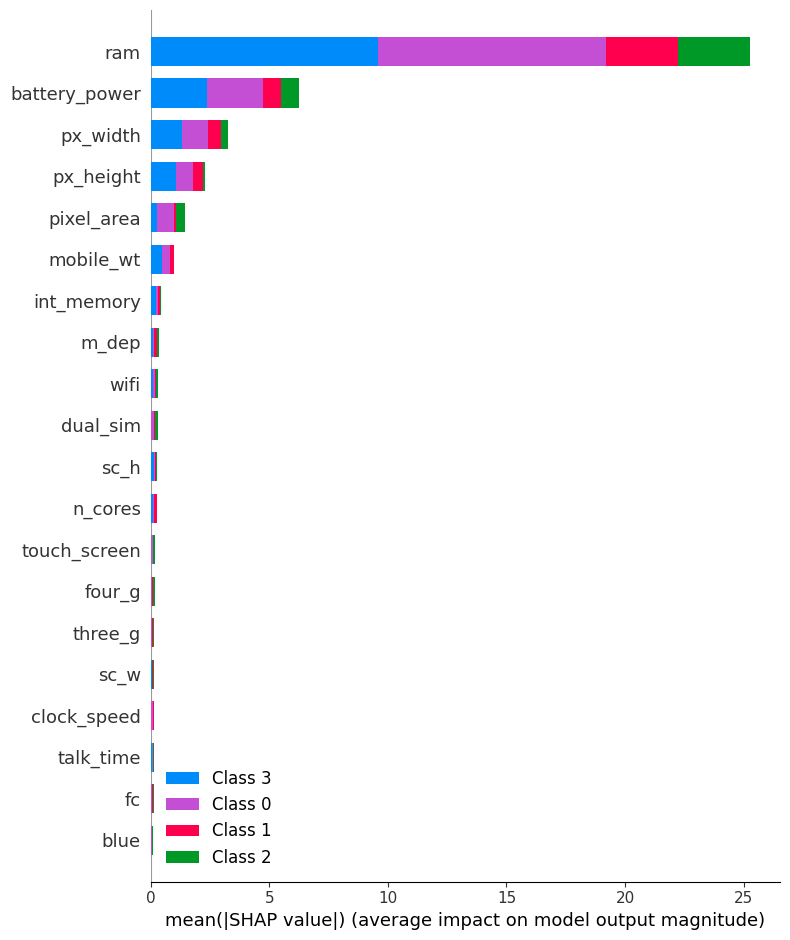

In [126]:
# Feature Importance Using SHAP

# Initialize SHAP Explainer for logistic regression
explainer = shap.Explainer(lr_model, X_train_scaled)

# Calculate SHAP values
shap_values = explainer(X_test_scaled)

# Summary Plot (global feature importance)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

Summary

- Model: Logistic Regression (interpretable, high accuracy)
- Explainability Tool: SHAP
- Insights:
  - Features like RAM, Battery Power, and Internal Memory are key drivers
  - SHAP explains not just which features matter, but how they influence predictions

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***